# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [43]:
# Your code here. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import linregress

In [3]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],\
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})


Draw a dispersion diagram (scatter plot) for the data.

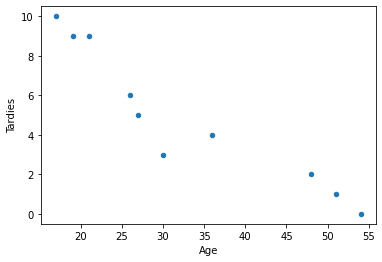

In [4]:
# Your code here.

ax1 = student_data.plot.scatter(x='Age',
                      y='Tardies')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
# Your response here. 
#El trend es que más jovenes más retrasos tienen



Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.

student_data.cov()


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [9]:
student_data.corr()


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here.
x = student_data.drop('Tardies', axis=1)
y = student_data.Tardies
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state=77)
print(len(x))
print(len(y))
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


10
10
8
2
8
2


In [15]:
slope, intercept, r_value, p_value, std_err = linregress(student_data)

print(f'Slope: {slope}\nIntercept: {intercept}\nR_value: {r_value}\nP_value: {p_value}\nStd_err: {std_err}')

Slope: -0.2428207709159808
Intercept: 12.888803363135768
R_value: -0.9391626886887121
P_value: 5.56665383455343e-05
Std_err: 0.03139728816158607


Plot your regression model on your scatter plot.

In [17]:
# Your code here.
linreg = LinearRegression()
linreg.fit(x_train, y_train)


LinearRegression()

Text(0, 0.5, 'Tardies')

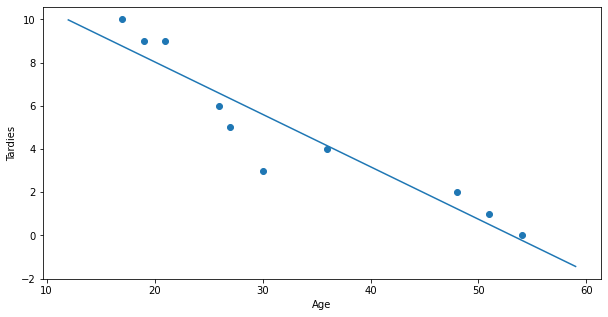

In [20]:
ages = range(int(intercept), 60)
tardies = [(slope * age + intercept) for age in ages]

fig =  plt.figure(facecolor = 'w', figsize = (10, 5))
plt.scatter(data = student_data, x = 'Age', y = 'Tardies')
plt.plot(ages,tardies)
plt.xlabel('Age')
plt.ylabel('Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
# Your response here.
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Age,-0.254707


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [31]:
# Import any libraries you may need & the data

data= pd.read_csv('/Users/fabiobisognin/Desktop/vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [32]:
# Your response here. 
data_1= data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'CO2 Emission Grams/Mile']]
print(data.corr())

                             Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                

In [33]:
#Mayor correlación con CO2 Emission  'Fuel Barrels/Year' and in second place 'Fuel Cost/Year'
# Menor correlación con CO2 Emission es 'Year'
#mayor correlacion inversa CO2 Emission is 'Combined MPG'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
# Your response here. 
import statsmodels.api as sm


#variables independientes
x = sm.add_constant(data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
#variable dependiente
y = data['CO2 Emission Grams/Mile']
      
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                             22:03:38   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [37]:
# Your response here. 

#R-squared = 0.981,
#Se acerca al valor 1 y ayuda en hacer predicciones

#P-value = 0.00.
#Es cero y da confianza al predecir modelos

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [38]:
# Your code here. 

df = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14]
                      , 'Attendants': [1, 2, 4, 4, 5, 7, 8, 13]})
df

,Invited,Attendants
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

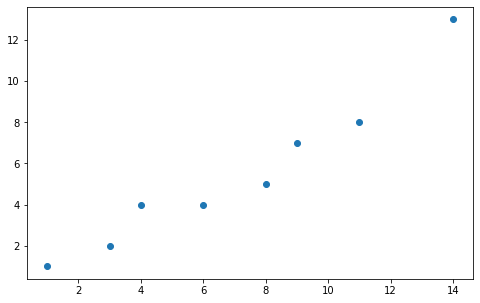

In [41]:
# Your code here.
fig =  plt.figure(facecolor = 'w', figsize = (8, 5))
plt.scatter(data = df, x = 'Invited', y = 'Attendants')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [44]:
# Your response here. 
slope, intercept, r_value, p_value, std_err= linregress(df['Invited'], df['Attendants'])

print(f'Slope: {slope}\nIntercept: {intercept}\nR_value: {r_value}\nP_value: {p_value}\nStd_err: {std_err}')

Slope: 0.8484848484848485
Intercept: -0.43939393939393945
R_value: 0.9652303546573691
P_value: 0.00010236374464090686
Std_err: 0.09380896778286217


Text(0.5, 1.0, 'Relación')

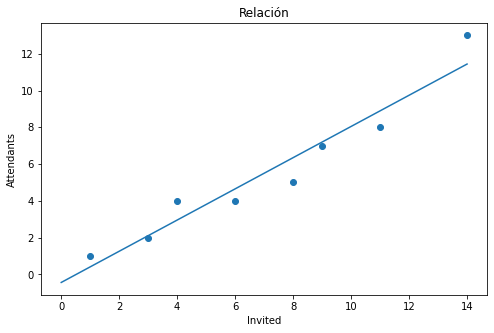

In [52]:
invited = range(int(intercept), max(df['Invited']) + 1)
attendant = [(slope * i + intercept) for i in invited]

fig =  plt.figure(facecolor = 'w', figsize = (8, 5))
plt.scatter(data = df, x = 'Invited', y = 'Attendants')
plt.plot(invited, attendant)
plt.xlabel('Invited')
plt.ylabel('Attendants')
plt.title('Relación')

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [53]:
# Your response here. 
#Hay una relación positiva fuerte entre los invitados y los que van a la fiesta. 
#Se puede rechazar la hipotesis nula

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 